In [3]:
from keras.layers import Conv2D, UpSampling2D
from keras.models import Sequential
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [30]:
path='Downloads/group photo/'

In [31]:
train_datagen = ImageDataGenerator(rescale=1. / 255)


train = train_datagen.flow_from_directory(path, 
                                          target_size=(256, 256), 
                                          batch_size=104, 
                                          class_mode=None)


Found 312 images belonging to 1 classes.


In [32]:
X =[]
Y =[]
for img in train[0]:
  try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0]) 
      Y.append(lab[:,:,1:] / 128) #A and B values range from -127 to 128, 
      #so we divide the values by 128 to restrict values to between -1 and 1.
  except:
     print('error')

In [33]:
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,)) #dimensions to be the same for X and Y
print(X.shape)
print(Y.shape)

(104, 256, 256, 1)
(104, 256, 256, 2)


In [34]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))

In [35]:
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 conv2d_14 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 256)       295168    
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 256)       590080    
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 512)       1180160   
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 512)      

In [36]:
model.fit(X,Y,validation_split=0.1, epochs=100, batch_size=16)

Epoch 1/100
6/6 [==============================] - 38s 6s/step - loss: 0.2573 - accuracy: 0.4660 - val_loss: 0.0152 - val_accuracy: 0.3834
Epoch 2/100
6/6 [==============================] - 39s 6s/step - loss: 0.0128 - accuracy: 0.4147 - val_loss: 0.0129 - val_accuracy: 0.5875
Epoch 3/100
6/6 [==============================] - 36s 6s/step - loss: 0.0118 - accuracy: 0.6050 - val_loss: 0.0123 - val_accuracy: 0.5995
Epoch 4/100
6/6 [==============================] - 41s 7s/step - loss: 0.0112 - accuracy: 0.5926 - val_loss: 0.0125 - val_accuracy: 0.6215
Epoch 5/100
6/6 [==============================] - 49s 8s/step - loss: 0.0114 - accuracy: 0.6197 - val_loss: 0.0121 - val_accuracy: 0.6216
Epoch 6/100
6/6 [==============================] - 46s 7s/step - loss: 0.0115 - accuracy: 0.6192 - val_loss: 0.0123 - val_accuracy: 0.6182
Epoch 7/100
6/6 [==============================] - 43s 7s/step - loss: 0.0111 - accuracy: 0.6173 - val_loss: 0.0120 - val_accuracy: 0.6212
Epoch 8/100
6/6 [==========

In [12]:
model.save('Downloads/model/colorize_autoencoder.model')

NameError: name 'model' is not defined

In [18]:
newmodel=tf.keras.models.load_model(
    'Downloads/model/colorize_autoencoder.model',
    custom_objects=None,
    compile=True)

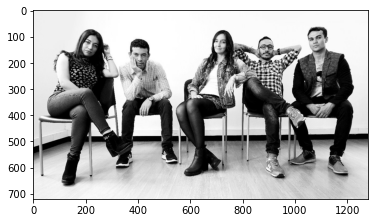

In [19]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
from matplotlib.pyplot import imshow

photo=imread("grou.jpg")

plt.imshow(photo)

img1_color=[]
img1 = tf.keras.utils.img_to_array(photo)
img1 = resize(img1 ,(256,256))
img1_color.append(img1)


In [20]:
img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))

In [21]:
output1 = newmodel.predict(img1_color)
output1 = output1*128


1/1 [==============================] - 0s 400ms/step


In [22]:
result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]
result=lab2rgb(result)
#imsave("result.png", lab2rgb(result))

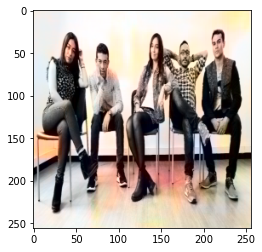

In [23]:
plt.imshow(result)

In [24]:
rs = resize(result ,(1080,720))

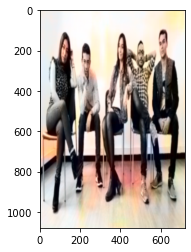

In [25]:
plt.imshow(rs)

In [128]:
imsave("eleresultt.png",(rs))